In [44]:
import pandas as pd

df = pd.read_csv('data/final_matches.csv',sep=",")

In [45]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,team,season
0,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3,0,Fulham,...,Match Report,NaN,13.0,5.0,14.1,2.0,0,0,Arsenal,2021
1,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2,1,West Ham,...,Match Report,NaN,7.0,3.0,14.8,0.0,0,0,Arsenal,2021
2,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1,3,Liverpool,...,Match Report,NaN,4.0,3.0,15.0,0.0,0,0,Arsenal,2021
3,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2,1,Sheffield Utd,...,Match Report,NaN,6.0,5.0,16.3,0.0,0,0,Arsenal,2021
4,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0,1,Manchester City,...,Match Report,NaN,11.0,3.0,18.4,2.0,0,0,Arsenal,2021


In [46]:
teams = df[['team']].drop_duplicates()
victorias = df[df['result'] == 'W']['team'].value_counts()
formations = df[df['result'] == 'W'].groupby(['team', 'formation']).size().reset_index(name='Wins')
formations

,team,formation,Wins
0,Arsenal,3-4-3,4
1,Arsenal,4-1-4-1,1
2,Arsenal,4-2-3-1,30
3,Arsenal,4-3-3,71
4,Arsenal,4-4-1-1,5
...,...,...,...
165,Wolverhampton Wanderers,3-5-2,7
166,Wolverhampton Wanderers,4-2-3-1,10
167,Wolverhampton Wanderers,4-3-3,2
168,Wolverhampton Wanderers,4-4-1-1,1


[Text(0, 3, '133'),
 Text(0, 3, '116'),
 Text(0, 3, '114'),
 Text(0, 3, '89'),
 Text(0, 3, '89'),
 Text(0, 3, '89'),
 Text(0, 3, '86'),
 Text(0, 3, '82'),
 Text(0, 3, '71'),
 Text(0, 3, '67'),
 Text(0, 3, '63'),
 Text(0, 3, '60'),
 Text(0, 3, '60'),
 Text(0, 3, '54'),
 Text(0, 3, '49'),
 Text(0, 3, '48'),
 Text(0, 3, '39'),
 Text(0, 3, '37'),
 Text(0, 3, '34'),
 Text(0, 3, '29'),
 Text(0, 3, '22'),
 Text(0, 3, '10'),
 Text(0, 3, '6'),
 Text(0, 3, '6'),
 Text(0, 3, '5'),
 Text(0, 3, '5'),
 Text(0, 3, '4')]

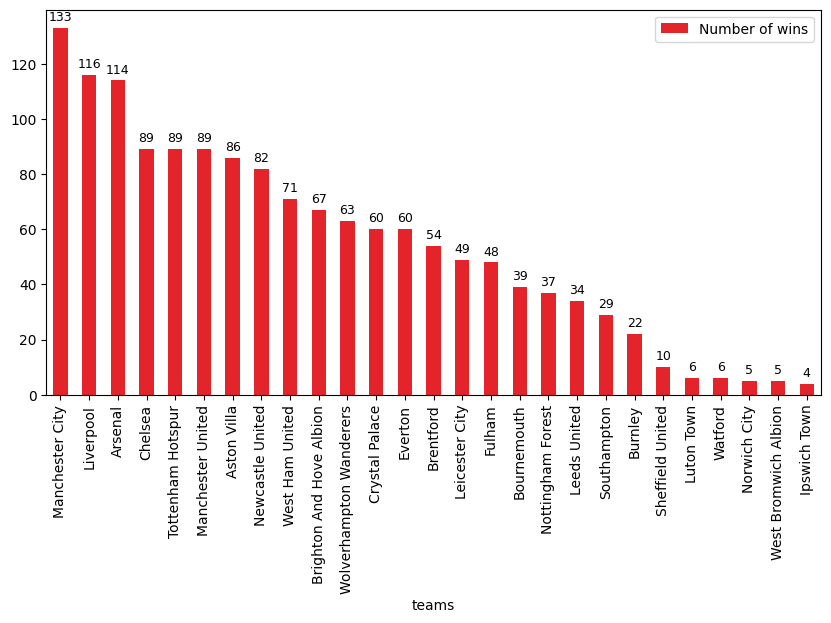

In [47]:
teams_graf = pd.DataFrame({
    "teams": teams['team'].values,
    "Number of wins": teams['team'].map(victorias).fillna(0).astype(int)
})
teams_graf = teams_graf.sort_values(by='Number of wins', ascending=False)

ax = teams_graf.plot(
    x="teams",
    y="Number of wins",
    kind="bar",
    figsize=(10, 5),
    color="#E3242B",
    legend=True
)

ax.bar_label(ax.containers[0], padding=3, fontsize=9)

ValueError: 2